Prop$_{GPEmu}$	3.435036323594376
Syn$_{GPEmu}$	2.693059336766125
Prop$_{Paper}$	8.09757369626861
Syn$_{Paper}$	3.419194225493341


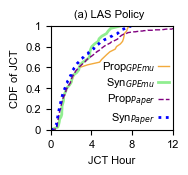

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fontsize=8

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = fontsize

fig = plt.gcf()
fig.set_size_inches(1.57, 1.35)
fig.subplots_adjust(wspace=0.15)

linewidth=1

legends = ['Prop$_{GPEmu}$', 'Syn$_{GPEmu}$', 'Prop$_{Paper}$', 'Syn$_{Paper}$']
filenames = ['gpemu-prop.csv', 'gpemu-synergy.csv', 'paper-prop.csv', 'paper-synergy.csv']
colors = ['#F2AA3C', 'lightgreen', 'purple', 'blue']
linestyles = ['-', '-', '--', ':']
linewidths = [1, 2, 1 ,2]
for i in range(4):
	df = pd.read_csv('las/'+filenames[i], delimiter=',', header=None, names=['jct', 'cdf'])
	jct = [float(x) for x in df['jct'].to_list()]
	cdf = [float(x) for x in df['cdf'].to_list()]
	print('{}\t{}'.format(legends[i], sum(jct)/len(jct)))
	jct.sort()
	cdf.sort()
	jct = [0] + jct
	cdf = [0] + cdf
	plt.plot(jct, cdf, linewidth=linewidths[i], linestyle=linestyles[i], label=legends[i], color=colors[i])
	
x_range = [0,12]
y_range = [0,1]
xticks = [0,4,8,12]
yticks = [0,0.2,0.4,0.6,0.8,1]
plt.ylim(y_range)
plt.xlim(x_range)
plt.xticks(xticks, xticks,fontsize=fontsize)
plt.yticks(yticks, yticks, fontsize=fontsize)


plt.ylabel('CDF of JCT', fontsize=fontsize)
plt.xlabel('JCT Hour', fontsize=fontsize)
plt.title('(a) LAS Policy', fontsize=fontsize, y=1, x=0.48)

plt.legend(loc="lower right", ncol=1, bbox_to_anchor=(1.05,-0.07), markerfirst=False, columnspacing=1, 
		   handlelength=1, handletextpad=0.2, frameon=False, labelspacing=0.2)

fig.set_dpi(100)
plt.savefig('las-cdf.eps', bbox_inches='tight')
plt.savefig('las-cdf.png', bbox_inches='tight')
